<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/008_Airbnb%E8%81%9A%E7%B1%BB%E5%88%86%E7%BE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 案例背景
Airbnb是AirBed and Breakfast("Air-b-n-b")的缩写，中文名是爱彼迎，是一家联系旅游人士和家有空房出租的房主的服务型网站 它可以为用户提供多样的住宿信息。

Airbnb在全球拥有广泛丰富的用户出行场景，自身在app、网页端及各种营销渠道会收集到用户非常全面的行为数据。通过这些数据锁定潜在的目标客群并制定相应的云销策略是爱彼迎发展的重要基石。
因此，本案例分析目标是应用聚类分析方法来分析Airbnb用户群体的核心特征。

# 数据字典
* id 唯—的用户id
* date_account_created 用户创建日期
* date_first_booking 第—次订房日期
* Gender 性别
* Age 年龄
* Married 已婚
* Children 小孩数量
* Android 曾在安卓app中预定
* Moweb 曾在手机移动网页预订
* Web 曾在电脑网页版预订
* Ios 曾在ios app预订
* L anguage_en 使用英文语言
* L an guage_Zh 使用中文语言
* Country_us 目的地是美国
* Country_eu 目的地是欧州国家

# 1. 数据概况分析

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
airbnb = pd.read_csv('/content/w3_airbnb.csv')
airbnb.head()

,age,date_account_created,date_first_booking,gender,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
0,56,9/28/2010,8/2/2010,F,1,0,1,0,1,0,1,0,1,1
1,42,12/5/2011,9/8/2012,F,1,0,0,0,0,1,1,0,0,1
2,41,9/14/2010,2/18/2010,U,1,0,1,0,1,0,1,0,0,2
3,46,1/2/2010,1/5/2010,F,1,0,1,0,1,0,1,0,0,2
4,47,1/3/2010,1/13/2010,F,1,0,1,0,1,0,1,0,1,3


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67936 entries, 0 to 67935
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   67936 non-null  int64 
 1   date_account_created  67936 non-null  object
 2   date_first_booking    67936 non-null  object
 3   gender                67936 non-null  object
 4   Language_EN           67936 non-null  int64 
 5   Language_ZH           67936 non-null  int64 
 6   Country_US            67936 non-null  int64 
 7   Country_EUR           67936 non-null  int64 
 8   android               67936 non-null  int64 
 9   moweb                 67936 non-null  int64 
 10  web                   67936 non-null  int64 
 11  ios                   67936 non-null  int64 
 12  Married               67936 non-null  int64 
 13  Children              67936 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 7.3+ MB


In [ ]:
airbnb.describe()

,age,Language_EN,Language_ZH,Country_US,Country_EUR,android,moweb,web,ios,Married,Children
count,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000
mean,47.874249,0.974476,0.005947,0.713907,0.159091,0.658355,0.340423,0.895828,0.067534,0.790155,1.536696
std,146.090906,0.157711,0.076886,0.451937,0.365764,0.474265,0.473855,0.305485,0.250947,0.407201,0.836273
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,42.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
airbnb = airbnb[airbnb['age']<=80]
airbnb = airbnb[airbnb['age']>=18]

In [ ]:
airbnb['age'].describe()

count    66473.000000
mean        36.040483
std         10.963735
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         80.000000
Name: age, dtype: float64

In [ ]:
airbnb['date_account_created'] = pd.to_datetime(airbnb['date_account_created'])
airbnb['date_first_booking'] = pd.to_datetime(airbnb['date_first_booking'])

In [ ]:
airbnb['yearsince_account_created'] = airbnb['date_account_created'].apply(lambda x:2022-x.year)
airbnb['yearsince_first_booking'] = airbnb['date_first_booking'].apply(lambda x:2022-x.year)

In [ ]:
print(airbnb['yearsince_account_created'].describe())
print(airbnb['yearsince_first_booking'].describe())

count    66473.000000
mean         9.035819
std          0.965431
min          8.000000
25%          8.000000
50%          9.000000
75%         10.000000
max         12.000000
Name: yearsince_account_created, dtype: float64
count    66473.000000
mean         8.907481
std          0.995303
min          7.000000
25%          8.000000
50%          9.000000
75%          9.000000
max         12.000000
Name: yearsince_first_booking, dtype: float64


In [ ]:
airbnb = pd.get_dummies(airbnb)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66473 entries, 0 to 67935
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   age                        66473 non-null  int64         
 1   date_account_created       66473 non-null  datetime64[ns]
 2   date_first_booking         66473 non-null  datetime64[ns]
 3   Language_EN                66473 non-null  int64         
 4   Language_ZH                66473 non-null  int64         
 5   Country_US                 66473 non-null  int64         
 6   Country_EUR                66473 non-null  int64         
 7   android                    66473 non-null  int64         
 8   moweb                      66473 non-null  int64         
 9   web                        66473 non-null  int64         
 10  ios                        66473 non-null  int64         
 11  Married                    66473 non-null  int64         
 12  Chil

In [ ]:
airbnb.drop(airbnb.select_dtypes(['datetime64']),axis=1,inplace=True)

# 2. Airbnb聚类分析

In [ ]:
airbnb_5=airbnb[['age','web','moweb','ios','android']]

In [ ]:
#数据标准化，使用sklearn中预处理的scale
from sklearn.preprocessing import scale
x=pd.DataFrame(scale(airbnb_5))

In [ ]:
from sklearn import cluster
model=cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [ ]:
airbnb_5['cluster']=model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
airbnb_5.head(20)

,age,web,moweb,ios,android,cluster
0,56,1,0,0,1,1
1,42,1,1,0,0,2
2,41,1,0,0,1,1
3,46,1,0,0,1,1
4,47,1,0,0,1,1
5,50,1,0,0,1,1
6,46,1,0,0,1,1
7,36,1,0,0,1,1
8,33,1,0,0,1,1
9,31,1,0,0,1,1


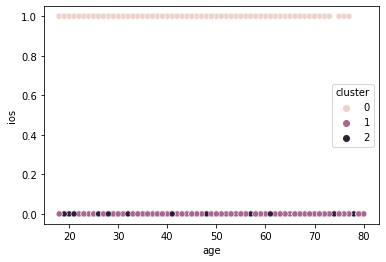

In [ ]:
sns.scatterplot(x='age',y='ios',hue='cluster',data=airbnb_5)

# 3. 模型评估与优化

In [ ]:
airbnb_5.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4535.0,33.067916,8.641708,18.0,27.0,31.0,37.0,77.0
1,40845.0,36.876215,11.581504,18.0,29.0,34.0,43.0,80.0
2,21093.0,35.061253,9.940771,18.0,28.0,33.0,39.0,80.0


In [ ]:
airbnb_5.groupby(['cluster'])['ios'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4535.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,40845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn import metrics#调用sklearn的metrics库
x_cluster=model.fit_predict(x)#个体与群的距离
score=metrics.silhouette_score(x,x_cluster)#评分越高，个体与群越近；评分越低，个体与群越远

In [ ]:
print(score)

0.6335056609373297


In [ ]:
centers=pd.DataFrame(model.cluster_centers_)

In [ ]:
#将群体分为5组
model=cluster.KMeans(n_clusters=5,random_state=10)
model.fit(x)

KMeans(n_clusters=5, random_state=10)

In [ ]:
airbnb_5['cluster']=model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


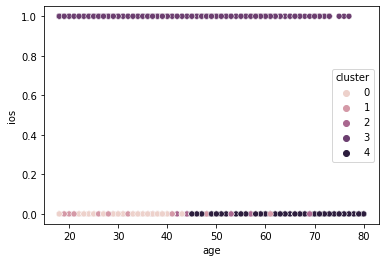

In [ ]:
sns.scatterplot(x='age',y='ios',hue='cluster',data=airbnb_5)

In [ ]:
centers=pd.DataFrame(model.cluster_centers_)

In [ ]:
print(centers)

          0         1         2         3         4
0 -0.411262  0.342225 -0.725096 -0.270589  0.727102
1 -0.093553  0.342225  1.379127 -0.270589 -1.375323
2 -0.252821 -2.922051 -0.122527 -0.270589  0.053148
3 -0.271129 -2.922051  0.133297  3.695642 -0.130558
4  1.696794  0.339802 -0.705458 -0.270589  0.707480


**3群：** 果粉，IOS重度用户，不怎么使用WEB

**2群：** 通过H5活动页面下单，不则么使用Android APP

In [ ]:
centers = pd.DataFrame(model.cluster_centers_)

In [ ]:
centers.to_csv('center_3.csv')